### Calibration of wave gauge with temperature compensation ###

In [1]:
import logging
import sys
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
from pathlib import Path
from typing import Optional, Dict
from IPython.display import  display, HTML
plt.rcParams["figure.figsize"] = [6.5, 14]
plt.rcParams["figure.autolayout"] = True

from utils2init import LoggingStyleAdapter

pd.options.plotting.backend = 'holoviews'  # turns .plot to .plplot

# Logging
logger = logging.getLogger(__name__)
logger.handlers[:] = []
lf = LoggingStyleAdapter(logger)
# logger.setLevel(logging.DEBUG)
# Add one of handlers
if False:
    # Notebook DisplayHandler
    class DisplayHandler(logging.Handler):
        def emit(self, record):
            message = self.format(record)
            display(message)

    class HTMLFormatter(logging.Formatter):
        level_colors = {
            logging.DEBUG: 'lightblue',
            logging.INFO: 'dodgerblue',
            logging.WARNING: 'goldenrod',
            logging.ERROR: 'crimson',
            logging.CRITICAL: 'firebrick'
        }

        def __init__(self):
            super().__init__(
                '<span style="font-weight: bold; color: green">{asctime}</span> '
                '[<span style="font-weight: bold; color: {levelcolor}">{levelname}</span>] '
                '{message}',
                style='{'
            )

        def format(self, record):
            record.levelcolor = self.level_colors.get(record.levelno, 'black')
            return HTML(super().format(record))

    handler = DisplayHandler()
    handler.setFormatter(HTMLFormatter())

    logger.addHandler(handler)
else:
    # StreamHandler
    from colorama import Fore, Back, Style

    class ColoredFormatter(logging.Formatter):
        """Colored log formatter."""

        def __init__(self, *args, colors: Optional[Dict[str, str]]=None, **kwargs) -> None:
            """Initialize the formatter with specified format strings."""

            super().__init__(*args, **kwargs)

            self.colors = colors if colors else {}

        def format(self, record) -> str:
            """Format the specified record as text."""

            record.color = self.colors.get(record.levelname, '')
            record.reset = Style.RESET_ALL

            return super().format(record)


    formatter = ColoredFormatter(
        '{asctime} |{color} {levelname:8} {reset}| {name} | {message}',
        style='{', datefmt='%Y-%m-%d %H:%M:%S',
        colors={
            'DEBUG': Fore.CYAN,
            'INFO': Fore.GREEN,
            'WARNING': Fore.YELLOW,
            'ERROR': Fore.RED,
            'CRITICAL': Fore.RED + Back.WHITE + Style.BRIGHT,
        }
    )

    handler = logging.StreamHandler(sys.stdout)
    handler.setFormatter(formatter)
    logger.addHandler(handler)


In [2]:
# Load data
# %tb
# Custom importing function
# importing my functions
# drive_d = 'D:' if sys.platform == 'win32' else '/mnt/D'  # to run on my Linux/Windows systems both
# scripts_path = Path(drive_d + '/Work/_Python3/And0K/h5toGrid/inclinometer')
# sys.path.append(str(Path(scripts_path).resolve()))
from csv_load import load_from_csv_gen
cfg_in = {'text_path':
    Path(r'd:\WorkData\_experiment\inclinometer\230425_Грузопоршневой\_raw\P\INKL_P{number:0>2}*.TXT')
}
for i, probe_id, path_csv, df_raw in load_from_csv_gen(cfg_in):
    lf.info('loaded {}', i)
    break
df_raw = df_raw[['P_counts', 'Temp']]

Raw files for 5 probes found:
p01: [WindowsPath('d:/WorkData/_experiment/inclinometer/230425_Грузопоршневой/_raw/P/@incl_p01.TXT')]
p02: [WindowsPath('d:/WorkData/_experiment/inclinometer/230425_Грузопоршневой/_raw/P/@incl_p02.TXT')]
p03: [WindowsPath('d:/WorkData/_experiment/inclinometer/230425_Грузопоршневой/_raw/P/@incl_p03.TXT')]
p04: [WindowsPath('d:/WorkData/_experiment/inclinometer/230425_Грузопоршневой/_raw/P/@incl_p04.TXT')]
p05: [WindowsPath('d:/WorkData/_experiment/inclinometer/230425_Грузопоршневой/_raw/P/@incl_p05.TXT')]
Loading 5 raw files...


79.9 % non-increased...


D:\Work\_Python3\And0K\h5toGrid\filters.py:57: NumbaExperimentalFeatureWarning: Use of isinstance() detected. This is an experimental feature.
  return np.where(bOk if bOk is not None else b, y[b], np.NaN)


Linearise time using reference frequency 5.0 (between holes > 2.0 s)
.2023-06-17 21:09:27 | INFO     | __main__ | loaded 1


In [3]:
lf.info('Processing file #{}. Data:', i)
df_raw

2023-06-17 21:09:47 | INFO     | __main__ | Processing file #1. Data:


P_counts   Temp
2023-04-25 12:24:11+00:00         1849841.0  21.63
2023-04-25 12:24:11.200000+00:00  1849809.0  21.63
2023-04-25 12:24:11.400000+00:00  1849805.0  21.63
2023-04-25 12:24:12+00:00         1849720.0  21.63
2023-04-25 12:24:12.200000+00:00  1849746.0  21.63
...                                     ...    ...
2023-04-25 18:44:40.600000+00:00  1836966.0  28.61
2023-04-25 18:44:40.800000+00:00  1836977.0  28.62
2023-04-25 18:44:41+00:00         1836888.0  28.62
2023-04-25 18:44:41.200000+00:00  1836927.0  28.62
2023-04-25 18:44:41.400000+00:00  1836876.0  28.61

[113400 rows x 2 columns]

In [14]:
import panel as pn
from bokeh.plotting import figure
# pn.extension()
pn.config.sizing_mode = 'stretch_width'
pn.config.

In [21]:
fig = figure()  # width=300, height=300)
xs = np.linspace(0, 10)
r = p.line(xs, np.sin(xs))

width_slider = pn.widgets.FloatSlider(name='Line Width', start=0.1, end=10)
width_slider.jslink(r.glyph, value='line_width')

layout = pn.Column(width_slider, fig)
# layout = pn.Row(text_input, markdown)


srv = pn.serve(layout, show=True)

INFO:bokeh.server.server:Starting Bokeh server version 3.1.1 (running on Tornado 6.3.2)
INFO:bokeh.server.tornado:User authentication hooks NOT provided (default user enabled)


Launching server at http://localhost:14055


In [12]:
width_slider.value

'Some text1245'

In [22]:
# srv.stop()
pn.state.kill_all_servers()

In [70]:
if False:
    style = """
    <style>
    div.output_area {
        overflow-y: scroll;
    }
    div.output_area img {
        max-width: unset;
    }
    </style>
    """
    HTML(style)


# def mouse_event(event):
#     print('x: {} and y: {}'.format(event.xdata, event.ydata))

#fig = plt.figure()
#cid = fig.canvas.mpl_connect('button_press_event', mouse_event)

df_raw.plot(grid=True, xlabel='Time')  # , include=['P_counts', 'Temp'] secondary_y = df_raw[['P_counts', 'Temp']]

# plt.plot(x, y)
# plt.show()
# click anywhere on the plot, and it will show the coordinates of the points on the console

AttributeError: Selection.selected property descriptor does not exist

In [68]:
# Atmospheric pressure, dBar:
y_a = 1008.5/100  # 1008.5 hPa
# Real pressure, dBar:
y = y_a + np.array([[0, 1*9.80665]]*3)  # converted from source values [0, 1 kg/cm2]
y_values = y.flatten()
print('Probe real pressure, dBar:\n', y_values)
# Probe mean values of recorded voltage, V and temperature, °C:
u = [[0.862565, 1.67355], [0.846437, 1.65218], [0.822848, 1.61338]]  # Voltage
t = [[1.74295, 2.16332], [8.63737, 8.73015], [19.1236, 19.2093]]     # Temperature
x_values = np.column_stack((np.ravel(u), np.ravel(t)))
print(f'Recordings ({x_values.shape} samples x features):\n', x_values)

INFO:bokeh.server.server:Starting Bokeh server version 3.1.1 (running on Tornado 6.3.2)
INFO:bokeh.server.tornado:User authentication hooks NOT provided (default user enabled)


Launching server at http://localhost:2547


In [69]:
# from scipy.optimize import curve_fit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


#define our polynomial model, with whatever degree we want
degree=1

# PolynomialFeatures will create a new matrix consisting of all polynomial combinations 
# of the features with a degree less than or equal to the degree we just gave the model (2)
poly_model = PolynomialFeatures(degree=degree)

# transform out polynomial features
poly_x_values = poly_model.fit_transform(x_values)

# For degree=2 should be in the form [1, a, b, a^2, ab, b^2]
# print(f'initial values {x_values[0]} mapped to:\n{poly_x_values[0]}')

# Fit the model
poly_model.fit(poly_x_values, y_values)

# we use linear regression as a base!!! ** sometimes misunderstood **
regr = LinearRegression()

regr.fit(poly_x_values, y_values)

#print(poly_x_values)

y_pred = regr.predict(poly_x_values)
print(f'Coefficients of {poly_model.get_feature_names_out()[1:]}:', f"[{', '.join(str(k) for k in ([regr.intercept_] + regr.coef_[1:].tolist()))}]")

mse = mean_squared_error(y_values, y_pred, squared=False)
print('Mean squared error:', mse)

In [46]:
# Show plots 
%matplotlib inline  # is it realy changes something in juputerlab
fig = plt.figure(figsize=plt.figaspect(0.4))
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 4, sharex=ax2)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

# Plot result surface
u_min, u_max, t_min, t_max, P_min, P_max = np.min(u), np.max(u), np.min(t), np.max(t), np.min(y_values), np.max(y_values)
print('u(min,max):', u_min, u_max, 't(min,max):', t_min, t_max, 'P(min,max):', P_min, P_max)
ptp_u, ptp_t = u_max - u_min, t_max - t_min
n = 50
X = np.linspace(u_min - ptp_u/n, u_max + ptp_u/n, n)
Y = np.linspace(t_min - ptp_t/n, t_max + ptp_t/n, n)
X, Y = np.meshgrid(X, Y)
Z_in = np.column_stack((X.ravel(), Y.ravel()))
Z = regr.predict(poly_model.fit_transform(Z_in)).reshape(X.shape)
surf = ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.2)
ax1.scatter3D(*x_values.T, y_values, color='k')
ax1.set_xlabel('voltage, V')
ax1.set_ylabel('temperature, °C')
ax1.set_zlabel('P, dBar')  # pressure
ax1.set_title('Fitting');

# Plot predictions lines for each sub experiment in assumption that external values changes linear between fitting points
# experiment's colors
c_experiments = cm.rainbow(np.linspace(0, 1, y.shape[0]))
# fitting points
ax2.scatter(x_values[:,0], y_values, c=np.repeat(c_experiments, y.shape[1], axis=0))
# predictions
print('Errors of fit for experiments with different mean temperature:')
for u_exp, t_exp, y_exp, c_exp in zip(u, t, y, c_experiments):
    # print(u_exp, t_exp)
    u_min, u_max, t_min, t_mean, t_max = np.min(u_exp), np.max(u_exp), np.min(t_exp), np.mean(t_exp), np.max(t_exp)
    # print('u(min,max):', u_min, u_max, 't(min,max):', t_min, t_max)
    X = np.linspace(u_min, u_max , n)
    Y = np.linspace(t_min, t_max , n)
    Z_in = np.column_stack((X, Y))
    Z = regr.predict(poly_model.fit_transform(Z_in))
    Z_bad = regr.intercept_ + (regr.coef_[1:] * Z_in).sum(axis=1)
    np.testing.assert_array_equal(Z, Z_bad)
    
    ax2.plot(X, Z, color=c_exp, label=f'{t_mean:.1f}')
    
    z_diff = y_exp - regr.predict(poly_model.fit_transform([[u_min, t_min], [u_max, t_max]]))
    print(f'{t_mean:.1f}:', z_diff)
    
    ax3.bar([u_min, u_max], z_diff, width=0.1, color=c_exp)
    ax3.set_xlabel('voltage, V')
    ax3.set_ylabel('P - P_fit, dBar')
ax2.legend(title='mean t, °C')
ax2.grid()
ax3.grid()

In [40]:
# Use formula for other data
u = [0.841866, 0.926501, 1.00791, 1.08949, 1.17089, 1.25182]
t = [15.0949, 15.0421, 14.9854, 14.9287, 14.884, 14.8525]
# Atmospheric pressure, dBar:
y_a = 1013/100  # 1008.5 hPa
# Real pressure, dBar:
y = y_a + np.append(0, np.arange(1.045, 1.045*(5 + 0.0001), 1.000))  # *9.80665
z = regr.predict(poly_model.fit_transform(np.column_stack((u, t))))
np.column_stack((y, z, y - z))

INFO:bokeh.server.server:Starting Bokeh server version 3.1.1 (running on Tornado 6.3.2)
INFO:bokeh.server.tornado:User authentication hooks NOT provided (default user enabled)


Launching server at http://localhost:13414


NameError: name 'interactive_clifford' is not defined

In [41]:
# display fitted polynom formula (not tried)
def join_txt(text,delim='*'):
    return np.asarray(delim.join(text),dtype=object)

if True: 
    variable_names=poly.get_feature_names_out(X.columns)
    variable_names=np.core.defchararray.replace(variable_names.astype(str),' ','*')    

    fit_coeffs=["{:0.5g}".format(x) for x in fit.coef_]

    arr_list=[fit_coeffs,variable_names]
    fit_equation=np.apply_along_axis(join_txt, 0, arr_list)
    fit_equation='+'.join(fit_equation)
    fit_equation=fit_equation.replace("*1+","+")
    fit_equation=fit_equation.replace("+-","-")

    print("Fit equation:")    
    print(fit_equation)

GridPlot(id='bedbc8f6-d9d9-41f9-a388-ce893a00ddba', ...)

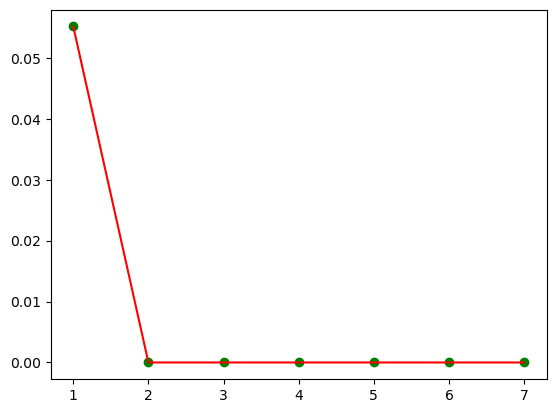

In [46]:
# check our accuracy for each degree, the lower the error the better!
number_degrees = [1,2,3,4,5,6,7]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
  
   poly_x_values = poly_model.fit_transform(x_values)
   poly_model.fit(poly_x_values, y_values)
  
   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y_values)
   y_pred = regression_model.predict(poly_x_values)
  
   plt_mean_squared_error.append(mean_squared_error(y_values, y_pred, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 